<a href="https://colab.research.google.com/github/DeeDoDo/Dee_python_projects/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
customer_df = pd.read_csv("/content/customerspends.csv")
customer_df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [ ]:
customer_df.shape

(20, 3)

In [ ]:
from sklearn.preprocessing import normalize
scaled_customerdf = normalize(customer_df.iloc[0:20, 0:3])
scaled_customerdf

array([[0.04731426, 0.99833082, 0.03311998],
       [0.12258113, 0.93345527, 0.3370981 ],
       [0.1534515 , 0.26700561, 0.95139931],
       [0.12735689, 0.99019984, 0.0573106 ],
       [0.21827935, 0.26717392, 0.9386012 ],
       [0.3388749 , 0.81894768, 0.46312903],
       [0.35736153, 0.433939  , 0.82703669],
       [0.28809615, 0.95431849, 0.07922644],
       [0.44279372, 0.21352497, 0.87082766],
       [0.54045962, 0.74313197, 0.39453552],
       [0.54293356, 0.2566595 , 0.79959306],
       [0.63774777, 0.75466819, 0.15412238],
       [0.54704968, 0.18515528, 0.81636644],
       [0.65682654, 0.19939377, 0.72720081],
       [0.55781743, 0.82928858, 0.03346905],
       [0.6172823 , 0.30478313, 0.7253067 ],
       [0.77097704, 0.60771131, 0.19047668],
       [0.50629556, 0.86070246, 0.05344231],
       [0.77067953, 0.58409396, 0.25472987],
       [0.8617305 , 0.26929078, 0.43000352]])

In [ ]:
scaled_customerdf = pd.DataFrame(scaled_customerdf, columns = customer_df.columns[0:3])
scaled_customerdf

,Customer,Apparel,Beauty and Healthcare
0,0.047314,0.998331,0.033120
1,0.122581,0.933455,0.337098
2,0.153452,0.267006,0.951399
3,0.127357,0.990200,0.057311
4,0.218279,0.267174,0.938601
5,0.338875,0.818948,0.463129
6,0.357362,0.433939,0.827037
7,0.288096,0.954318,0.079226
8,0.442794,0.213525,0.870828
9,0.540460,0.743132,0.394536


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

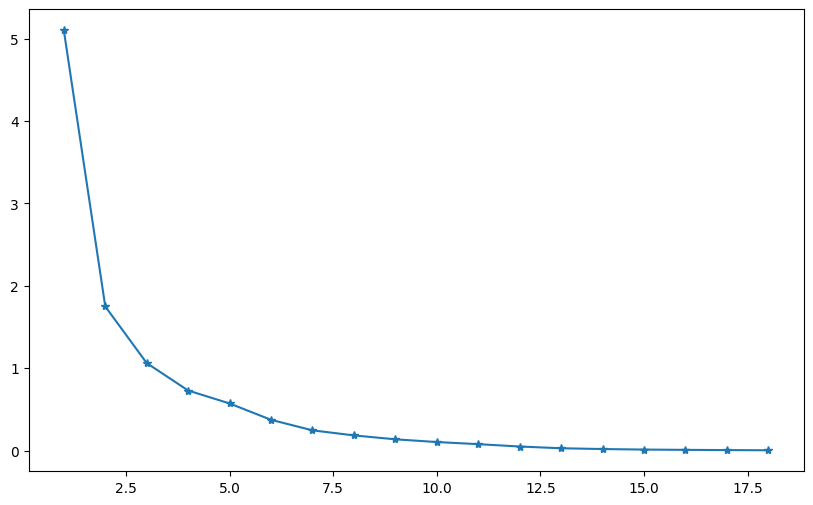

In [ ]:
cluster_range = range(1,19)
cluster_error = []

from sklearn.cluster import KMeans

for k in cluster_range:
  clusters = KMeans(k)
  clusters.fit(scaled_customerdf)
  cluster_error.append(clusters.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,6))
plt.plot(cluster_range, cluster_error, marker = '*');

In [ ]:
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit(scaled_customerdf)
customer_df['Cluster_ID'] = clusters.labels_
customer_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer,Apparel,Beauty and Healthcare,Cluster_ID
0,1,21.10,0.70,0
1,2,15.23,5.50,0
2,3,5.22,18.60,1
3,4,31.10,1.80,0
4,5,6.12,21.50,1
5,6,14.50,8.20,0
6,7,8.50,16.20,1
7,8,26.50,2.20,0
8,9,4.34,17.70,1
9,10,13.75,7.30,2
